# Sentiment Analysis on Skincare Product

### | Dataset : This dataset was collected using a Python scraper in March 2023 and contains comprehensive information about Sephora's beauty products and user reviews, specifically focusing on skincare items. |

| Features | Description |
|----------|-------------|
| Unamed:0 | Index of Data |
| Rating | rating of a product |
| Is_recommended (Y) | the label of the product is either recommended (1) or not (0) |
| helpfulness | total pos feedback count/total_feedback_count |
| total_feedback_count | total feedback from other user |
| total_pos_feedback_count | total positive feedback from other user |
| review_text | user reviews for this product |
| review_title | titile from usser reviews |
| skin_tone | skin tone of the user |
| eye_color | eye color of the user |
| skin_type | skin type of the user |
| hair_color | hair color of the user |
| product_id | unique product id of the product |
| brand_name | product brand name |
| price_usd | product price per unit  |

In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# NLP
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# Regular Expression
import re

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




## Loading Dataset

In [181]:
# dataframe
df = pd.read_csv("dataset_nlp.csv")
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0.1,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,0,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,1,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,2,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,3,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,4,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


## Data Cleaning

In [182]:
# get all column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168432 entries, 0 to 168431
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              168432 non-null  int64  
 1   Unnamed: 0                168432 non-null  int64  
 2   rating                    168432 non-null  int64  
 3   is_recommended            127179 non-null  float64
 4   helpfulness               70138 non-null   float64
 5   total_feedback_count      168432 non-null  int64  
 6   total_neg_feedback_count  168432 non-null  int64  
 7   total_pos_feedback_count  168432 non-null  int64  
 8   submission_time           168432 non-null  object 
 9   review_text               168209 non-null  object 
 10  review_title              122599 non-null  object 
 11  skin_tone                 132082 non-null  object 
 12  eye_color                 121531 non-null  object 
 13  skin_type                 144055 non-null  o

In [183]:
# removing unused columns
unused_columns = ['Unnamed: 0.1', 'Unnamed: 0', 'helpfulness', 'total_neg_feedback_count', 'submission_time', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id']
df =df.drop(columns=unused_columns)
df

,rating,is_recommended,total_feedback_count,total_pos_feedback_count,review_text,review_title,product_name,brand_name,price_usd
0,5,1.0,2,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,5,1.0,0,0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...
168427,5,NaN,1,1,This cleanser easily takes off all my makeup a...,Works AMAZING,SEA Deep Dive Cleansing Gel,tarte,12.0
168428,5,NaN,9,8,This is the best cleanser I have ever used! It...,Must have!!!,SEA Deep Dive Cleansing Gel,tarte,12.0
168429,5,NaN,31,31,I have never seen a cleanser that takes off ma...,Holy Moly!,SEA Deep Dive Cleansing Gel,tarte,12.0
168430,5,NaN,12,12,Leaves my skin squeaky clean! Great product! G...,LOVE,SEA Deep Dive Cleansing Gel,tarte,12.0


In [184]:
# create helpfulness variable
df['helpfulness'] = np.where(df['total_feedback_count'] == 0, 0, df['total_pos_feedback_count'] / df['total_feedback_count'])
df

,rating,is_recommended,total_feedback_count,total_pos_feedback_count,review_text,review_title,product_name,brand_name,price_usd,helpfulness
0,5,1.0,2,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,1.000000
1,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.000000
2,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.000000
3,5,1.0,0,0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.000000
4,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
168427,5,NaN,1,1,This cleanser easily takes off all my makeup a...,Works AMAZING,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
168428,5,NaN,9,8,This is the best cleanser I have ever used! It...,Must have!!!,SEA Deep Dive Cleansing Gel,tarte,12.0,0.888889
168429,5,NaN,31,31,I have never seen a cleanser that takes off ma...,Holy Moly!,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
168430,5,NaN,12,12,Leaves my skin squeaky clean! Great product! G...,LOVE,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000


In [185]:
# if df[helpfulness] <= 0.5, drop rows
df = df[df['helpfulness'] >= 0.5]
df

,rating,is_recommended,total_feedback_count,total_pos_feedback_count,review_text,review_title,product_name,brand_name,price_usd,helpfulness
0,5,1.0,2,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,1.000000
5,4,1.0,1,1,The scent isn’t my favourite but it works grea...,Great!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
8,5,1.0,1,1,I love this stuff. I first had the sample size...,Must have.,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
9,5,1.0,2,2,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
21,1,0.0,11,8,Just like Aquaphor just get something cheaper...,Overrated!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.727273
...,...,...,...,...,...,...,...,...,...,...
168427,5,NaN,1,1,This cleanser easily takes off all my makeup a...,Works AMAZING,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
168428,5,NaN,9,8,This is the best cleanser I have ever used! It...,Must have!!!,SEA Deep Dive Cleansing Gel,tarte,12.0,0.888889
168429,5,NaN,31,31,I have never seen a cleanser that takes off ma...,Holy Moly!,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
168430,5,NaN,12,12,Leaves my skin squeaky clean! Great product! G...,LOVE,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000


In [186]:
# if all rows is nan, drop rows
df = df.dropna()
df

,rating,is_recommended,total_feedback_count,total_pos_feedback_count,review_text,review_title,product_name,brand_name,price_usd,helpfulness
0,5,1.0,2,2,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,1.000000
5,4,1.0,1,1,The scent isn’t my favourite but it works grea...,Great!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
8,5,1.0,1,1,I love this stuff. I first had the sample size...,Must have.,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
9,5,1.0,2,2,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1.000000
21,1,0.0,11,8,Just like Aquaphor just get something cheaper...,Overrated!,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,0.727273
...,...,...,...,...,...,...,...,...,...,...
167889,5,1.0,15,14,Great cleanser! I️ literally feel my pores unc...,Love it!,SEA Deep Dive Cleansing Gel,tarte,12.0,0.933333
167910,5,1.0,1,1,This cleanser is amazing! It takes off all the...,Hydrated supple clean skin,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
167919,2,0.0,1,1,"Did a good job of cleansing my skin, but man d...",Very drying,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000
167980,5,1.0,1,1,"This takes off so much makeup, but does it ver...",Good for my Sensitive Skin,SEA Deep Dive Cleansing Gel,tarte,12.0,1.000000


In [187]:
print("total data length: ", len(df))
df.info()

total data length:  32182
<class 'pandas.core.frame.DataFrame'>
Index: 32182 entries, 0 to 167985
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    32182 non-null  int64  
 1   is_recommended            32182 non-null  float64
 2   total_feedback_count      32182 non-null  int64  
 3   total_pos_feedback_count  32182 non-null  int64  
 4   review_text               32182 non-null  object 
 5   review_title              32182 non-null  object 
 6   product_name              32182 non-null  object 
 7   brand_name                32182 non-null  object 
 8   price_usd                 32182 non-null  float64
 9   helpfulness               32182 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 2.7+ MB


## Data Insight

In [188]:
print("Total unique product: ", df['product_name'].nunique())
print("Totak unique brand: ", df['brand_name'].nunique())

Total unique product:  61
Totak unique brand:  26


In [189]:
df.groupby('is_recommended').count()['product_name']

,product_name
is_recommended,
0.0,7495
1.0,24687


In [190]:
# visualize with plotly pie
fig = go.Figure(data=[go.Pie(labels=df['is_recommended'].value_counts().index, values=df['is_recommended'].value_counts().values, textinfo='value+percent')])
fig.update_layout(title_text='Recommended vs Not Recommended')
fig.show()

In [193]:
# ordinal brand name by is_recommended sum
ordinal_brand = df.groupby('product_name').agg({'is_recommended': ['sum', 'count']}).sort_values(('is_recommended', 'sum'), ascending=False).reset_index()
ordinal_brand['is_recommended_ratio'] = ordinal_brand['is_recommended']['sum'] / ordinal_brand['is_recommended']['count']
ordinal_brand = ordinal_brand.rename(columns={
  'sum': 'positive review',
  'count': 'total_review'
})
ordinal_brand.sort_values('is_recommended_ratio', ascending=False).head(5)

product_name  is_recommended               \
                                           positive review total_review   
60          Gentle Hydra-Gel Face Cleanser             1.0            1   
53     Glycol Lactic Radiance Renewal Mask            90.0           94   
20    Volcanic AHA Pore Clearing Clay Mask           424.0          457   
15     Salicylic Acid Acne + Pore Cleanser           570.0          641   
39  Therapeutic Sulfur Acne Treatment Mask           155.0          176   

   is_recommended_ratio  
                         
60             1.000000  
53             0.957447  
20             0.927790  
15             0.889236  
39             0.880682

In [155]:
ordinal_brand.sort_values('is_recommended_ratio', ascending=False).tail(5)

product_name  is_recommended               \
                                          positive review total_review   
57            SEA Deep Dive Cleansing Gel            47.0           73   
25       C-Rush Vitamin C Gel Moisturizer           308.0          485   
24                     The Kissu Lip Mask           388.0          624   
27  Slaai  Makeup-Melting Butter Cleanser           273.0          455   
59    Advanced Night Repair Eye Gel-Cream            34.0           58   

   is_recommended_ratio  
                         
57             0.643836  
25             0.635052  
24             0.621795  
27             0.600000  
59             0.586207

In [157]:
# sort product_name by price
price_usd = df.groupby('product_name').agg({'price_usd': 'mean'}).sort_values('price_usd', ascending=False).reset_index().head(5)
price_usd

,product_name,price_usd
0,Advanced Night Repair Synchronized Multi-Recov...,195.0
1,Estee Lauder Advanced Night Repair Synchronize...,115.0
2,T.L.C. Sukari Babyfacial AHA + BHA Mask,80.0
3,Advanced Night Repair Eye Gel-Cream,72.0
4,Smart Clinical Repair Wrinkle Correcting Serum,71.0


In [158]:
price_usd = df.groupby('product_name').agg({'price_usd': 'mean'}).sort_values('price_usd', ascending=False).reset_index().tail(5)
price_usd

,product_name,price_usd
56,Mini Acne Control Clarifying Cleanser,14.00
57,Mini Superfood Antioxidant Cleanser,14.00
58,Mini Anti-Aging Cleansing Gel,12.00
59,SEA Deep Dive Cleansing Gel,12.00
60,Salicylic Acid Acne + Pore Cleanser,11.99


In [159]:
# ordinal brand name by is_recommended sum
ordinal_brand = df.groupby('brand_name').agg({'is_recommended': ['sum', 'count']}).sort_values(('is_recommended', 'sum'), ascending=False).reset_index()
ordinal_brand['is_recommended_ratio'] = ordinal_brand['is_recommended']['sum'] / ordinal_brand['is_recommended']['count']
ordinal_brand = ordinal_brand.rename(columns={
  'sum': 'positive review',
  'count': 'total_review'
})
ordinal_brand.sort_values('is_recommended_ratio', ascending=False).head(5)

brand_name  is_recommended              is_recommended_ratio
                       positive review total_review                     
25            NUDESTIX             1.0            1             1.000000
22  REN Clean Skincare            90.0           94             0.957447
17           innisfree           424.0          457             0.927790
13      The INKEY List           570.0          641             0.889236
21               belif           100.0          119             0.840336

In [160]:
ordinal_brand.sort_values('is_recommended_ratio', ascending=False).tail(5)

brand_name  is_recommended              is_recommended_ratio
                   positive review total_review                     
19           Murad           279.0          382             0.730366
4   Drunk Elephant          1394.0         1974             0.706180
16         Farmacy           438.0          639             0.685446
3   Summer Fridays          1756.0         2576             0.681677
24           tarte            47.0           73             0.643836

## Data Preprocessing

In [161]:
# unite column
df["full_review"] = df["review_title"].astype(str) + " " + df["review_text"].astype(str)
df['full_review']

<ipython-input-161-2dfbcd849e0d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,full_review
0,Taught me how to double cleanse! I use this wi...
5,Great! The scent isn’t my favourite but it wor...
8,Must have. I love this stuff. I first had the ...
9,RUN TO PURCHASE I purchased the Sweet Candy sc...
21,Overrated! Just like Aquaphor just get someth...
...,...
167889,Love it! Great cleanser! I️ literally feel my ...
167910,Hydrated supple clean skin This cleanser is am...
167919,Very drying Did a good job of cleansing my ski...
167980,Good for my Sensitive Skin This takes off so m...


In [162]:
# remove null values

#Before remove
df.isnull().sum()

#Remove missing data
df.dropna(inplace=True)

<ipython-input-162-6874cd6df01b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
#Remove duplicate values

#Before remove
df_duplicated = df.duplicated().sum()
print(f"There are {df_duplicated} duplicates values in the dataset")

#After remove
df = df.drop_duplicates()
df_remove_duplicated = df.duplicated().sum()
print(f"There are {df_remove_duplicated} duplicate values in the dataset")

There are 1 duplicates values in the dataset
There are 0 duplicate values in the dataset


In [164]:
# drop duplicates
df = df.drop_duplicates()

In [165]:
# distribution label after data cleaning
fig = go.Figure(data=[go.Pie(labels=df['is_recommended'].value_counts().index, values=df['is_recommended'].value_counts().values, textinfo='value+percent')])
fig.update_layout(title_text='Recommended vs Not Recommended')
fig.show()

In [166]:
# is_recommended and full_review to str
df["is_recommended"] = df["is_recommended"].astype(str)
df["full_review"] = df["full_review"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32181 entries, 0 to 167985
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rating                    32181 non-null  int64  
 1   is_recommended            32181 non-null  object 
 2   total_feedback_count      32181 non-null  int64  
 3   total_pos_feedback_count  32181 non-null  int64  
 4   review_text               32181 non-null  object 
 5   review_title              32181 non-null  object 
 6   product_name              32181 non-null  object 
 7   brand_name                32181 non-null  object 
 8   price_usd                 32181 non-null  float64
 9   helpfulness               32181 non-null  float64
 10  full_review               32181 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.9+ MB


In [167]:
# convert is_recommended
df["is_recommended"] = df["is_recommended"].replace({"0.0":"Negative","1.0":"Positive"})
df['is_recommended']

,is_recommended
0,Positive
5,Positive
8,Positive
9,Positive
21,Negative
...,...
167889,Positive
167910,Positive
167919,Negative
167980,Positive


## Exploratory Data Analysis

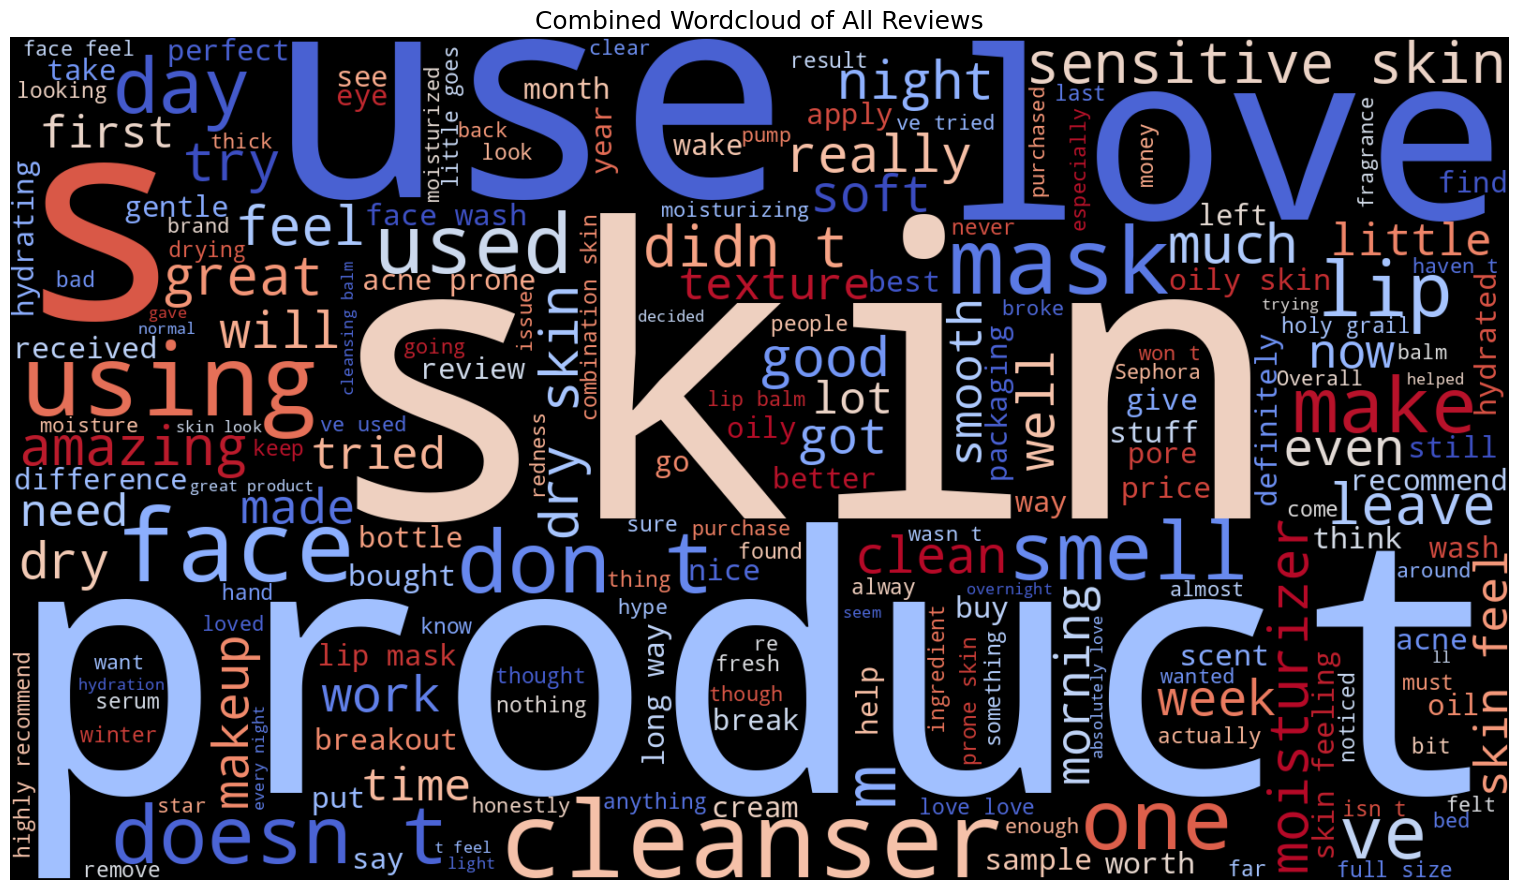

In [168]:
# Define the stopwords set
stopwords_set = set(STOPWORDS)

# Combine all reviews into a single string for the word cloud
combined_text = " ".join(content for content in df["full_review"])

# Create a word cloud from the combined reviews
wordcloud = WordCloud(colormap="coolwarm", stopwords=stopwords_set, width=1600, height=900).generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Combined Wordcloud of All Reviews", fontsize=18)
plt.axis('off')  # Turn off axis
plt.tight_layout()

# Show the plot
plt.show()

In [178]:
entity_frequency = df.groupby(["is_recommended","product_name"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)

# get is_recommended positive and negative count by product name
entity_frequency_positive = entity_frequency[entity_frequency["is_recommended"] == "Positive"]
entity_frequency_negative = entity_frequency[entity_frequency["is_recommended"] == "Negative"]

# merge dataframe
entity_frequency_positive_negative = pd.merge(entity_frequency_positive, entity_frequency_negative, on="product_name", how="left")
sort_entity = entity_frequency_positive_negative[['product_name', 'frequency_x', 'frequency_y']] = entity_frequency_positive_negative[['product_name', 'frequency_x', 'frequency_y']]
sort_entity = sort_entity.rename(columns={
  'frequency_x': 'positive review',
  'frequency_y': 'negative review'
})

sort_entity[['product_name', 'positive review']].sort_values('positive review', ascending=False).head(5)

,product_name,positive review
24,Lip Sleeping Mask Intense Hydration with Vitam...,2907
51,Superfood Antioxidant Cleanser,1651
33,Mini Superfood Antioxidant Cleanser,1651
32,Mini Superberry Hydrate + Glow Dream Mask,958
50,Superberry Hydrate + Glow Dream Night Mask wit...,958


In [179]:
sort_entity[['product_name', 'negative review']].sort_values('negative review', ascending=False).head(5)

,product_name,negative review
24,Lip Sleeping Mask Intense Hydration with Vitam...,1045.0
51,Superfood Antioxidant Cleanser,519.0
33,Mini Superfood Antioxidant Cleanser,518.0
23,Jet Lag Mask,410.0
30,Mini Jet Lag Mask,410.0


Text(0.5, 1.0, 'Frequency of entity')

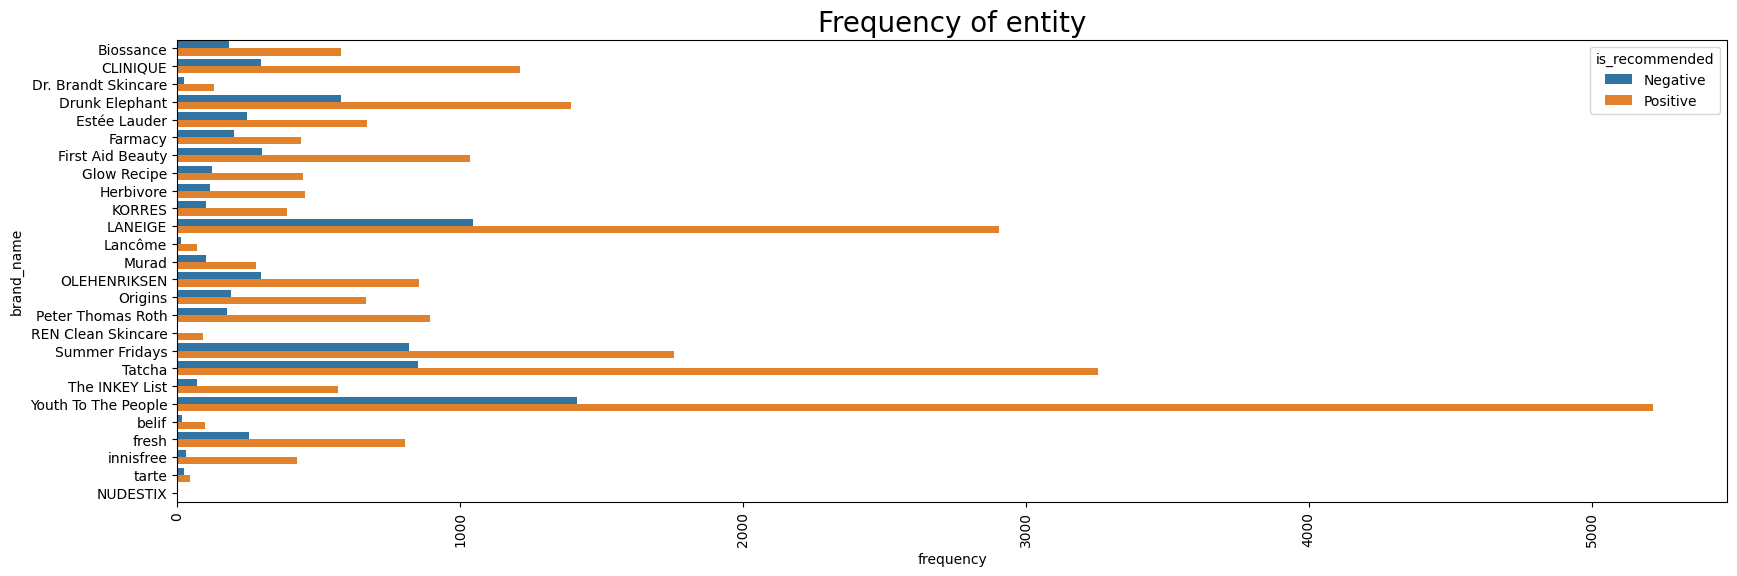

In [25]:
entity_frequency = df.groupby(["is_recommended","brand_name"]).size().reset_index()
entity_frequency.rename(columns={0: 'frequency'}, inplace=True)

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(data=entity_frequency,y="brand_name",x="frequency",hue="is_recommended").set_title("Frequency of entity", fontsize=20)

## Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'removed_df' is your original DataFrame and 'df_val' is the validation DataFrame
# Concatenate 'brand_name' and 'full_review' to form the feature variable
x = df["brand_name"] + " " + df["full_review"]  # Combining features for training
y = df["is_recommended"]  # Target variable

# Step 1: Split into training (70%) and temp (30%) for further validation and testing
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 2: Split the temp data (30%) into validation (10%) and testing (20%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=2/3, random_state=42)

# Now we have:
# x_train, y_train -> Training data (70%)
# x_val, y_val -> Validation data (10%)
# x_test, y_test -> Testing data (20%)


In [27]:
x_train[0]

'NUDESTIX Taught me how to double cleanse! I use this with the Nudestix “Citrus Clean Balm & Make-Up Melt“ to double cleanse and it has completely changed my skin (for the better). The make-up melt is oil based and removes all of your makeup super easily. I follow-up with this water based cleanser, and I also use this just by itself when I’m not wearing make-up. It leaves the skin gently cleansed, but without stripping the skin. 10/10 recommend combining with the make-up melt. It’s perfection!'

In [28]:
# regular expression
print(re.sub(r'[^a-zA-Z0-9\s]', '', x_train[0]))

NUDESTIX Taught me how to double cleanse I use this with the Nudestix Citrus Clean Balm  MakeUp Melt to double cleanse and it has completely changed my skin for the better The makeup melt is oil based and removes all of your makeup super easily I followup with this water based cleanser and I also use this just by itself when Im not wearing makeup It leaves the skin gently cleansed but without stripping the skin 1010 recommend combining with the makeup melt Its perfection


## Text Preprocessing

In [29]:
def tagging(pos_tag):
  if pos_tag.startswith('J'):
    return wordnet.ADJ
  elif pos_tag.startswith('V'):
    return wordnet.VERB
  elif pos_tag.startswith('N'):
    return wordnet.NOUN
  elif pos_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

In [32]:
def preprocessing(text):
    #lowercase
    text_lower = text.lower()

    # #regex
    text_regex = re.sub(r'[^a-zA-Z0-9\s]', '', text_lower)

    #tokenize
    text_tokenize = word_tokenize(text_regex)

    #split text and entity
    entity = text_tokenize[0]
    text_content = text_tokenize[1:]

    #pos tagging
    text_pos = pos_tag(text_content)

    #remove punctuation and stopwords
    remove_words = set(list(string.punctuation) + stopwords.words('english'))
    text_remove = [(word,pos) for (word,pos) in text_pos if word not in remove_words]

    #lemmaization
    word_lem = WordNetLemmatizer()
    text_lem = [(word_lem.lemmatize(word,pos=tagging(pos)),pos) if tagging(pos) != None
                 else (word_lem.lemmatize(word),pos) for (word,pos) in text_remove]

    #combine text and entity
    text_lem.append((entity,))

    return text_lem

In [31]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
print(preprocessing(x_train[0]))

[('taught', 'NN'), ('double', 'VB'), ('cleanse', 'NN'), ('use', 'VBP'), ('nudestix', 'JJ'), ('citrus', 'NN'), ('clean', 'JJ'), ('balm', 'NN'), ('makeup', 'NN'), ('melt', 'NN'), ('double', 'VB'), ('cleanse', 'NN'), ('completely', 'RB'), ('change', 'VBN'), ('skin', 'NN'), ('good', 'JJR'), ('makeup', 'NN'), ('melt', 'NN'), ('oil', 'NN'), ('base', 'VBN'), ('remove', 'VBZ'), ('makeup', 'NN'), ('super', 'IN'), ('easily', 'RB'), ('followup', 'VBP'), ('water', 'NN'), ('base', 'VBN'), ('cleanser', 'NN'), ('also', 'RB'), ('use', 'VBP'), ('im', 'NN'), ('wear', 'VBG'), ('makeup', 'NN'), ('leave', 'VBZ'), ('skin', 'NN'), ('gently', 'RB'), ('cleanse', 'VBN'), ('without', 'IN'), ('strip', 'VBG'), ('skin', 'NN'), ('1010', 'CD'), ('recommend', 'NN'), ('combine', 'VBG'), ('makeup', 'NN'), ('melt', 'VBD'), ('perfection', 'NN'), ('nudestix',)]


In [34]:
#Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocessing)),
    ('tfidf', TfidfTransformer())
])

x_train_preprocesed = pipeline.fit_transform(x_train)
x_test_preprocessed = pipeline.transform(x_test)
x_val_preprocessed = pipeline.transform(x_val)

In [49]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors= 3)
x_train_preprocesed, y_train = smote.fit_resample(x_train_preprocesed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [50]:
print(x_train_preprocesed.shape, y_train.shape)

(34620, 28138) (34620,)


In [51]:
# Class Imbalance check
y_train.value_counts()

,count
is_recommended,
Positive,17310
Negative,17310


In [77]:
#piechart y_train
fig = go.Figure(data=[go.Pie(labels=y_train.value_counts().index, values=y_train.value_counts().values, textinfo='value+percent')])
fig

In [52]:
classifier = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [53]:
classifier_accruacy = []

for clf in classifier:
  model = clf.fit(x_train_preprocesed, y_train)

  trainset_pred = model.predict(x_train_preprocesed)
  testset_pred = model.predict(x_test_preprocessed)
  valset_pred = model.predict(x_val_preprocessed)

  trainset_acc = accuracy_score(trainset_pred, y_train)
  testset_acc = accuracy_score(testset_pred, y_test)
  valset_acc = accuracy_score(valset_pred, y_val)

  classifier_accruacy.append([
      clf.__class__.__name__,
      trainset_acc,
      testset_acc,
      valset_acc
  ])

In [54]:
for res in classifier_accruacy:
  print(res)

['LogisticRegression', 0.9634315424610052, 0.9244989902128321, 0.930391547545059]
['KNeighborsClassifier', 0.5437608318890814, 0.2686033866708094, 0.2753262896208825]
['DecisionTreeClassifier', 1.0, 0.8640671120086997, 0.8623368551895587]
['RandomForestClassifier', 1.0, 0.9221687121329812, 0.9164077066500932]


## Build model

In [55]:
# Logistic Regression

build_model = LogisticRegression(
    random_state = 42
).fit(x_train_preprocesed, y_train)
test = build_model.predict(x_test_preprocessed)
val = build_model.predict(x_val_preprocessed)

train = build_model.predict(x_train_preprocesed)
print("train accuracy: ", accuracy_score(train, y_train))

train accuracy:  0.9634315424610052


In [56]:
# Save model sklearn
import joblib
joblib.dump(build_model, 'build_model.pkl')

['build_model.pkl']

In [57]:
print("test accuracy: ", accuracy_score(test, y_test))
print("val accuracy: ", accuracy_score(val, y_val))

test accuracy:  0.9244989902128321
val accuracy:  0.930391547545059


In [58]:
# x pipeline
x_test_preprocessed

<6437x28138 sparse matrix of type '<class 'numpy.float64'>'
	with 217602 stored elements in Compressed Sparse Row format>

In [59]:
# Confussion matrix
print(classification_report(y_test, test))

              precision    recall  f1-score   support

    Negative       0.81      0.88      0.85      1501
    Positive       0.96      0.94      0.95      4936

    accuracy                           0.92      6437
   macro avg       0.89      0.91      0.90      6437
weighted avg       0.93      0.92      0.93      6437



## Validation pipeline

In [68]:
val_classification = classification_report(y_val, val)
print(val_classification)

              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86       777
    Positive       0.96      0.95      0.95      2441

    accuracy                           0.93      3218
   macro avg       0.90      0.91      0.91      3218
weighted avg       0.93      0.93      0.93      3218



In [76]:
# visualize validation confussion matrix heatmap
matrix = confusion_matrix(y_val, val)
fig = px.imshow(matrix, text_auto=True, color_continuous_scale='Blues', labels=dict(x='Predicted', y='Actual', color='Count'),
                x=['Negative', 'Positive'], y=['Negative', 'Positive'])
fig.update_layout(title_text='Confusion Matrix on Validation Pipeline')
fig.show()

In [85]:
# show top 10 prediction on validation set
y_val_df = pd.DataFrame({'Data': x_val,'Actual': y_val, 'Predicted': val})
y_val_df.head(10)

,Data,Actual,Predicted
45536,First Aid Beauty Love this! Must have! This is...,Positive,Positive
44708,First Aid Beauty Great Cleanser I have aging s...,Positive,Positive
85498,"Drunk Elephant Drying over time On the plus, i...",Positive,Positive
117847,Youth To The People LOVE IT I love this mask. ...,Positive,Positive
118325,Youth To The People Magical Perfectly hydratin...,Positive,Positive
79206,"KORRES Amazing and Cruelty Free! Wow, I love t...",Positive,Positive
3174,LANEIGE Saved my lips! I had extremely chapped...,Positive,Positive
92090,Drunk Elephant Wanted to love it I wanted to l...,Negative,Negative
157180,Glow Recipe Pretty good!! ♡ The little plastic...,Positive,Positive
25643,"First Aid Beauty love,love,love !! Love this p...",Positive,Positive


## Using real words

In [104]:
sentiment = "good, the quality and price is amazing"
sentiment_preprocessed = pipeline.transform([sentiment])
build_model.predict(sentiment_preprocessed)

array(['Positive'], dtype=object)

In [105]:
# generate postive and negative review from Gemini 1.5 Pro
df = pd.DataFrame(columns=['sentiment', 'review'])

# Positive sentences
positive_sentences = [
    "This cream leaves my skin feeling incredibly soft and hydrated.",
    "I've noticed a significant improvement in my skin's texture since using this.",
    "The serum absorbs quickly and doesn't leave a greasy residue.",
    "My complexion looks brighter and more radiant after just a few weeks.",
    "This cleanser effectively removes makeup without stripping my skin."
]

# Negative sentences
negative_sentences = [
    "This product caused breakouts and irritation on my sensitive skin.",
    "The scent is overpowering and artificial.",
    "I didn't notice any visible improvements after using this for a month.",
    "The texture is thick and difficult to spread evenly.",
    "The packaging is flimsy and leaked product."
]


# Add positive sentences to the DataFrame
for sentence in positive_sentences:
    df.loc[len(df)] = ['Positive', sentence]

# Add negative sentences to the DataFrame
for sentence in negative_sentences:
    df.loc[len(df)] = ['Negative', sentence]


print(df)

  sentiment                                             review
0  Positive  This cream leaves my skin feeling incredibly s...
1  Positive  I've noticed a significant improvement in my s...
2  Positive  The serum absorbs quickly and doesn't leave a ...
3  Positive  My complexion looks brighter and more radiant ...
4  Positive  This cleanser effectively removes makeup witho...
5  Negative  This product caused breakouts and irritation o...
6  Negative          The scent is overpowering and artificial.
7  Negative  I didn't notice any visible improvements after...
8  Negative  The texture is thick and difficult to spread e...
9  Negative        The packaging is flimsy and leaked product.


In [106]:
# Create pipeline
multiply_sentiment_pipeline = pipeline.transform(df['review'])
mulitple_pred = build_model.predict(multiply_sentiment_pipeline)
df.insert(1, 'prediction', '')
df['prediction'] = mulitple_pred
df

,sentiment,prediction,review
0,Positive,Positive,This cream leaves my skin feeling incredibly s...
1,Positive,Negative,I've noticed a significant improvement in my s...
2,Positive,Positive,The serum absorbs quickly and doesn't leave a ...
3,Positive,Positive,My complexion looks brighter and more radiant ...
4,Positive,Positive,This cleanser effectively removes makeup witho...
5,Negative,Negative,This product caused breakouts and irritation o...
6,Negative,Positive,The scent is overpowering and artificial.
7,Negative,Negative,I didn't notice any visible improvements after...
8,Negative,Negative,The texture is thick and difficult to spread e...
9,Negative,Negative,The packaging is flimsy and leaked product.
